# Read-Image

#### Repositório para testes da biblioteca OpenCV,  o projeto destinasse a identificar padrões em imagens

In [2]:
#importa todas as bibliotecas usadas
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

##### Carregar a imagem base das derivadas que serão analisadas

In [42]:
#Carregando gabarito base em escala de cinza
gBase = cv.imread('dataset/imgs/gabarito_circular_simples.png', cv.IMREAD_GRAYSCALE)

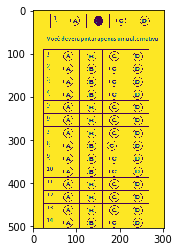

In [43]:
plt.imshow(gBase)
plt.show()

#### Carregar o gabarito já preenchido

In [44]:
gPreenchido = cv.imread('dataset/imgs/gabarito_circular_simples_preenchido.png', cv.IMREAD_GRAYSCALE)

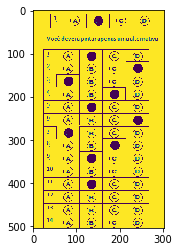

In [45]:
plt.imshow(gPreenchido)
plt.show()

###### Identificando a diferença entre o gabarito base e o preenchido

In [47]:
gDiferenca = cv.subtract(gBase,gPreenchido) #Identificando as diferenças entre os gabaritos

In [48]:
_,gDiferenca = cv.threshold(gDiferenca, 155, 255, cv.THRESH_OTSU) #tornando a diferença uma img binária

In [49]:
kernel = np.ones((5,5),np.uint8) #definindo o quadrado para cobrir as falhas

In [50]:
gDiferencaClose = cv.morphologyEx(gDiferenca, 
                                  cv.MORPH_CLOSE, 
                                  kernel) #cobrindo as falhas existentes na img diferença

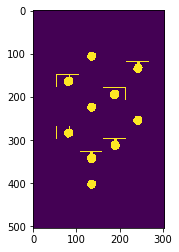

In [51]:
plt.imshow(gDiferencaClose)
plt.show()

Após identificar a diferença entre os gabaritos, os mesmos podem ser analisados para identificar qual a questão corresponde marcada

In [69]:
def find_shapes(img):
    # Configuração dos parâmetros do SimpleBlobDetector.
    params = cv.SimpleBlobDetector_Params()
     
    # Alterar limites
    params.minThreshold = 100;
    params.maxThreshold = 5000;
     
    # Filtrar por Área.
    params.filterByArea = True
    params.minArea = 20
     
    # Filtrar por Circularidade
    params.filterByCircularity = False
    params.minCircularity = 0.785
     
    # Filtrar por convexidade
    params.filterByConvexity = False
    params.minConvexity = 0.87
     
    # Filtrar por Inércia
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Criando o detector baseado na versão do CV
    is_cv3 = cv.__version__.startswith("3.")
    if is_cv3:
        detector = cv.SimpleBlobDetector_create()
    else:
        detector = cv.SimpleBlobDetector()
     
    #Detectando corpos
    keypoints = detector.detect(img)
      
    # Criando nova imagem com os elementos identificandos pelo detector
    im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]),
            (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv.imwrite("dataset/imgs/identificadas/shapes.jpg", im_with_keypoints); 

In [70]:
find_shapes(gDiferenca)

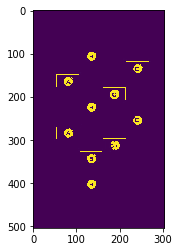

In [71]:
img = cv.imread('dataset/imgs/identificadas/shapes.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

Foi possivei identificar que muitos elementos além das possíveis respostas são identificadas, por isso a imagem deve ser refinada, podendo assim identificar pontos centrais das respostas

In [53]:
gDiferencaLimpa = cv.erode(gDiferencaClose, kernel, iterations=2) #refinando a aproximação do ponto

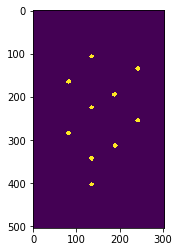

In [54]:
plt.imshow(gDiferencaLimpa)
plt.show()

##### Enumerando as respostas